In [4]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Fetch all data from the directory
directory = "../../data/json_dump"
data = []
for file in os.listdir(directory):
    jsonObj = pd.read_json(os.path.join(directory, file), lines=True)
    data.append(jsonObj)
data = pd.concat(data)


In [6]:
# # Fetch all data from the directory
# directory = "../dummy_data/"
# data = []
# jsonObj = pd.read_json(os.path.join(directory, "uniform_sample1.jsonl"), lines=True)
# data.append(jsonObj)
# data = pd.concat(data)


In [7]:
# reduce data to unique cpc ids
y02count={}
arr_count={}
for index, row in data.iterrows():
    arr_y02_truncated=set()
    flag=0
    if type(row['cpc_id'])==list or type(row['cpc_id'])==set :
        for j in row['cpc_id']:
            if j.startswith("Y02"):
                arr_y02_truncated.add(j.split()[0])
    else:
        if j.startswith("Y02"):
            arr_y02_truncated.add(j.split()[0])
    row['cpc_id']=arr_y02_truncated
    for k in arr_y02_truncated:      
        y02count[k]=y02count.get(k,0)+1
    arr_count[len(arr_y02_truncated)]=arr_count.get(len(arr_y02_truncated),0)+1
    

In [21]:
# reduce data to unique cpc ids
y02count={}
arr_count={}
for index, row in data.iterrows():
    arr_y02_truncated=set()
    flag=0
    if type(row['cpc_id'])==list or type(row['cpc_id'])==set :
        for j in row['cpc_id']:
            if j.startswith("Y02"):
                arr_y02_truncated.add(j.split()[0])
    else:
        if row['cpc_id'].startswith("Y02"):
            arr_y02_truncated.add(row['cpc_id'].split()[0])
    row['cpc_id']=arr_y02_truncated
    if len(arr_y02_truncated)==0:print(row)
    for k in arr_y02_truncated:      
        y02count[k]=y02count.get(k,0)+1
    arr_count[str(len(arr_y02_truncated))]=arr_count.get(str(len(arr_y02_truncated)),0)+1
    

In [28]:
y02count_sorted= sorted(y02count.items(), key=lambda x: x[1], reverse=True)
import pprint
pp = pprint.PrettyPrinter(depth=4)
pp.pprint(y02count_sorted)

[('Y02E', 3948),
 ('Y02T', 3293),
 ('Y02B', 1990),
 ('Y02P', 1967),
 ('Y02D', 1447),
 ('Y02A', 740),
 ('Y02W', 472),
 ('Y02C', 195),
 ('Y02S', 3),
 ('Y02F', 2),
 ('Y02M', 2),
 ('Y02R', 1),
 ('Y02Y', 1),
 ('Y02N', 1)]


Text(0.5, 1.0, 'Y02 Distribution')

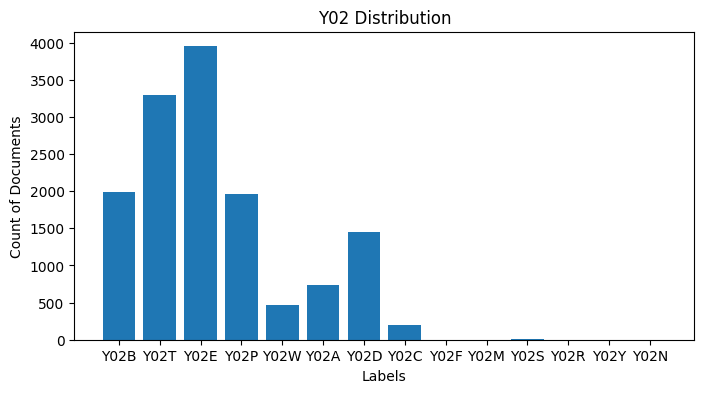

In [25]:
fig = plt.figure(figsize = (8, 4))
plt.bar(list(y02count.keys()), list(y02count.values()))
plt.xlabel("Labels")
plt.ylabel("Count of Documents")
plt.title("Y02 Distribution")
plt.show()

Text(0, 0.5, 'Count of Documents')

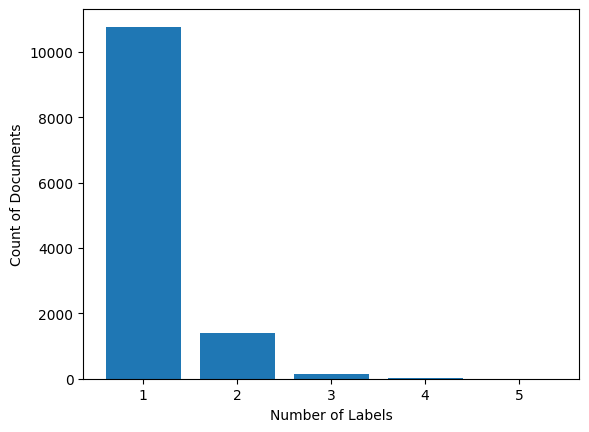

In [26]:
plt.bar(list(arr_count.keys()),  list(arr_count.values()))
plt.xlabel("Number of Labels")
plt.ylabel("Count of Documents")
plt.show()

In [29]:
sum1=0
for i,v in arr_count.items():
    sum1=sum1+(int(i)*v)
print(f"Average number of topics assigned per Document {sum1/len(data)}")

Average number of topics assigned per Document 1.140470397404704


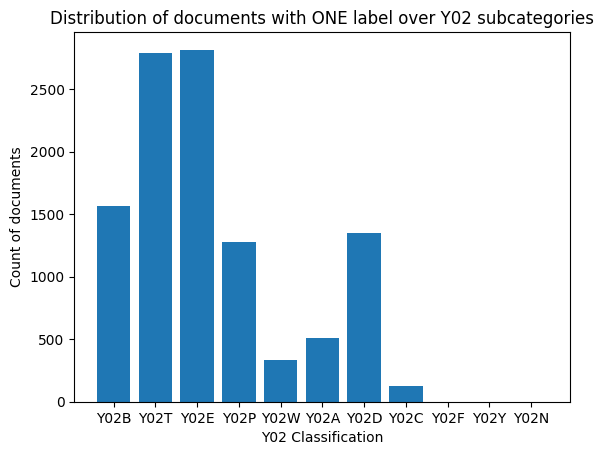

In [31]:
# For docs with one label: lots:
# reduce data to unique cpc ids
dict_count_1={}
for index, row in data.iterrows():
    if len(row['cpc_id'])==1:
        for e in row['cpc_id']:
            break
        dict_count_1[e]=dict_count_1.get(e,0)+1
    
plt.bar(list(dict_count_1.keys()),  list(dict_count_1.values()))
plt.xlabel("Y02 Classification")
plt.ylabel("Count of documents")
plt.title("Distribution of documents with ONE label over Y02 subcategories")
plt.show()

In [32]:
counte=0
countt=0
countet=0
for i in data['cpc_id']:
    if len(i)>=2:
        if 'Y02E' in i:
            counte=counte+1
            # continue
        if 'Y02T' in i:
            countt=countt+1
            # continue
        if 'Y02E' in i and 'Y02T' in i:
            # print(i)
            countet=countet+1
            
        
print(f"Count of documents in Y02E: {counte}")
print(f"Count of documents in Y02T: {countt}")
print(f"Count of documents in both Y02E and Y02T: {countet}")

Count of documents in Y02E 1134
Count of documents in Y02T 506
Count of documents in both Y02E and Y02T 392


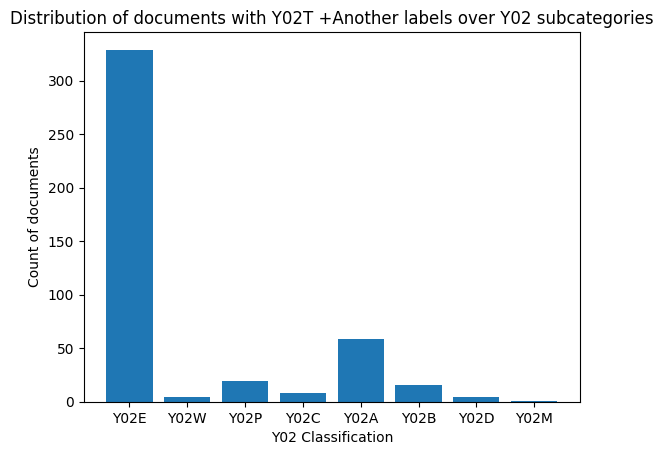

In [34]:
count=0
dict_count_2={}
for i in data['cpc_id']:
    if len(i)==2:
        count=count+1
        if 'Y02T' in i:
            for e in i:
                if (e!='Y02T'):break
            dict_count_2[e]=dict_count_2.get(e,0)+1

   
plt.bar(list(dict_count_2.keys()),  list(dict_count_2.values()))
plt.xlabel("Y02 Classification")
plt.ylabel("Count of documents")
plt.title("Distribution of documents with Y02T+Another labels over Y02 subcategories")
plt.show()

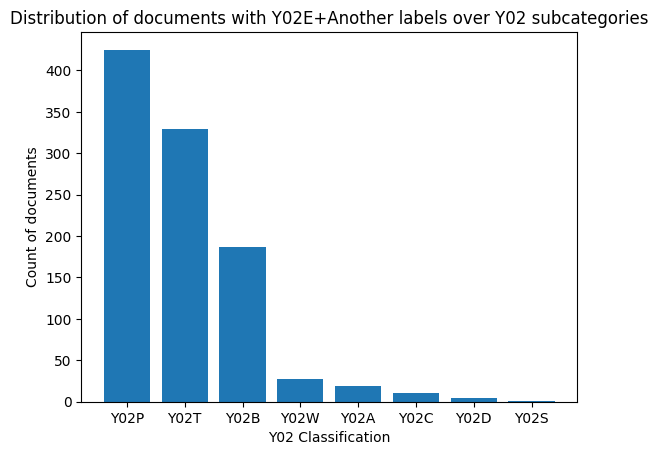

In [35]:
count=0
dict_count_2={}
for i in data['cpc_id']:
    if len(i)==2:
        count=count+1
        if 'Y02E' in i:
            for e in i:
                if e!='Y02E':break
            dict_count_2[e]=dict_count_2.get(e,0)+1


plt.bar(list(dict_count_2.keys()),  list(dict_count_2.values()))
plt.xlabel("Y02 Classification")
plt.ylabel("Count of documents")
plt.title("Distribution of documents with Y02E+Another labels over Y02 subcategories")
plt.show()

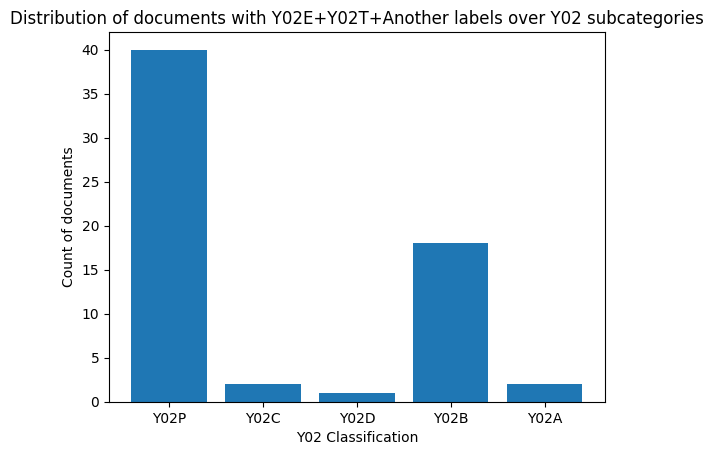

In [36]:
count=0
dict_count_2={}
for i in data['cpc_id']:
    if len(i)>=2:
        if 'Y02T' in i and 'Y02E' in i:
                c=len(i)
                c1=0
                for e in i:
                    c1=c1+1
                    if (e!='Y02T' and e!='Y02E'):break
                if(c1==c): count=count+1

                else:
                    dict_count_2[e]=dict_count_2.get(e,0)+1

plt.bar(list(dict_count_2.keys()),  list(dict_count_2.values()))
plt.xlabel("Y02 Classification")
plt.ylabel("Count of documents")
plt.title("Distribution of documents with Y02E+Y02T+Another labels over Y02 subcategories")
plt.show()